## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
EPOCHS = 10 # IF you feel too run to finish, try to make it smaller
LEARNING_RATE = 1e-3
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.1, 0.5, 0.9]
redice_lr_patient = [1,5,9]

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
import itertools
from keras.callbacks import ReduceLROnPlateau
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=reduce_patient, 
                              verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.10, reduce_patient: 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizatio

50000/50000 [==============================] - 8s 155us/step - loss: 1.9600 - acc: 0.3272 - val_loss: 2.0141 - val_acc: 0.3209
Epoch 6/10
50000/50000 [==============================] - 8s 157us/step - loss: 1.9102 - acc: 0.3402 - val_loss: 1.9680 - val_acc: 0.3318
Epoch 7/10
50000/50000 [==============================] - 8s 155us/step - loss: 1.8711 - acc: 0.3523 - val_loss: 1.9351 - val_acc: 0.3422
Epoch 8/10
50000/50000 [==============================] - 8s 155us/step - loss: 1.8377 - acc: 0.3622 - val_loss: 1.9001 - val_acc: 0.3506
Epoch 9/10
50000/50000 [==============================] - 8s 155us/step - loss: 1.8074 - acc: 0.3727 - val_loss: 1.8790 - val_acc: 0.3574
Epoch 10/10
50000/50000 [==============================] - 8s 154us/step - loss: 1.7817 - acc: 0.3795 - val_loss: 1.8547 - val_acc: 0.3598
Numbers of exp: 3, reduce_factor: 0.50, reduce_patient: 1
_________________________________________________________________
Layer (type)                 Output Shape              Par

Epoch 2/10
50000/50000 [==============================] - 7s 131us/step - loss: 2.3184 - acc: 0.2400 - val_loss: 2.3057 - val_acc: 0.2539
Epoch 3/10
50000/50000 [==============================] - 7s 131us/step - loss: 2.1387 - acc: 0.2801 - val_loss: 2.1412 - val_acc: 0.2868
Epoch 4/10
50000/50000 [==============================] - 7s 136us/step - loss: 2.0348 - acc: 0.3072 - val_loss: 2.0500 - val_acc: 0.3049
Epoch 5/10
50000/50000 [==============================] - 8s 150us/step - loss: 1.9639 - acc: 0.3248 - val_loss: 1.9944 - val_acc: 0.3190
Epoch 6/10
50000/50000 [==============================] - 7s 144us/step - loss: 1.9101 - acc: 0.3415 - val_loss: 1.9514 - val_acc: 0.3315
Epoch 7/10
50000/50000 [==============================] - 7s 149us/step - loss: 1.8667 - acc: 0.3541 - val_loss: 1.9132 - val_acc: 0.3406
Epoch 8/10
50000/50000 [==============================] - 7s 143us/step - loss: 1.8309 - acc: 0.3649 - val_loss: 1.8869 - val_acc: 0.3503
Epoch 9/10
50000/50000 [==========

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 173us/step - loss: 2.7657 - acc: 0.1485 - val_loss: 2.6389 - val_acc: 0.1897
Epoch 2/10
50000/50000 [==============================] - 7s 133us/step - loss: 2.2971 - acc: 0.2383 - val_loss: 2.2684 - val_acc: 0.2576
Epoch 3/10
50000/50000 [==============================] - 7s 135us/step - loss: 2.1230 - acc: 0.2833 - val_loss: 2.1098 - val_acc: 0.2912
Epoch 4/10
50000/50000 [==============================] - 7s 137us/step - loss: 2.0252 - acc: 0.3105 - val_loss: 2.0419 - val_acc: 0.3096
Epoch 5/10
50000/50000 [==============================] - 7s 135us/step - loss: 1.9567 - acc: 0.3300 - val_loss: 1.9761 - val_acc: 0.3292
Epoch 6/10
50000/50000 [==============================] - 7s 136us/step - loss: 1.9043 - acc: 0.3457 - val_loss: 1.9279 - val_acc: 0.3389
Epoch 7/10
50000/50000 [==============================] - 7s 136us/step - loss: 1.8620 - acc: 0.3578 - val_loss: 1.8885 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 187us/step - loss: 1.8633 - acc: 0.3632 - val_loss: 1.9130 - val_acc: 0.3654
Epoch 2/10
50000/50000 [==============================] - 7s 139us/step - loss: 1.5288 - acc: 0.4635 - val_loss: 1.6254 - val_acc: 0.4291
Epoch 3/10
50000/50000 [==============================] - 7s 145us/step - loss: 1.4276 - acc: 0.5020 - val_loss: 1.5548 - val_acc: 0.4497
Epoch 4/10
50000/50000 [==============================] - 8s 156us/step - loss: 1.3597 - acc: 0.5245 - val_loss: 1.5468 - val_acc: 0.4565
Epoch 5/10
50000/50000 [==============================] - 7s 141us/step - loss: 1.3067 - acc: 0.5452 - val_loss: 1.6363 - val_acc: 0.4191
Epoch 6/10
50000/50000 [==============================] - 7s 139us/step - loss: 1.2594 - acc: 0.5624 - val_loss: 1.5798 - val_acc: 0.4419
Epoch 7/10
50000/50000 [==============================] - 7s 142us/step - loss: 1.2191 - acc: 0.5772 - val_loss: 1.5512 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 174us/step - loss: 2.0352 - acc: 0.3177 - val_loss: 1.9459 - val_acc: 0.3439
Epoch 2/10
50000/50000 [==============================] - 6s 116us/step - loss: 1.6653 - acc: 0.4174 - val_loss: 1.7206 - val_acc: 0.4047
Epoch 3/10
50000/50000 [==============================] - 6s 116us/step - loss: 1.5714 - acc: 0.4492 - val_loss: 1.6679 - val_acc: 0.4157
Epoch 4/10
50000/50000 [==============================] - 6s 118us/step - loss: 1.5122 - acc: 0.4701 - val_loss: 1.6447 - val_acc: 0.4256
Epoch 5/10
50000/50000 [==============================] - 6s 117us/step - loss: 1.4673 - acc: 0.4865 - val_loss: 1.5970 - val_acc: 0.4432
Epoch 6/10
50000/50000 [==============================] - 6s 116us/step - loss: 1.4327 - acc: 0.5000 - val_loss: 1.5580 - val_acc: 0.4550
Epoch 7/10
50000/50000 [==============================] - 6s 120us/step - loss: 1.4019 - acc: 0.5114 - val_loss: 1.5555 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 181us/step - loss: 2.0762 - acc: 0.3018 - val_loss: 2.0541 - val_acc: 0.3233
Epoch 2/10
50000/50000 [==============================] - 6s 117us/step - loss: 1.7018 - acc: 0.4038 - val_loss: 1.8130 - val_acc: 0.3753
Epoch 3/10
50000/50000 [==============================] - 6s 118us/step - loss: 1.6025 - acc: 0.4393 - val_loss: 1.7428 - val_acc: 0.3952
Epoch 4/10
50000/50000 [==============================] - 6s 118us/step - loss: 1.5424 - acc: 0.4584 - val_loss: 1.6406 - val_acc: 0.4250
Epoch 5/10
50000/50000 [==============================] - 6s 123us/step - loss: 1.4953 - acc: 0.4758 - val_loss: 1.6120 - val_acc: 0.4367
Epoch 6/10
50000/50000 [==============================] - 6s 118us/step - loss: 1.4607 - acc: 0.4895 - val_loss: 1.5824 - val_acc: 0.4454
Epoch 7/10
50000/50000 [==============================] - 6s 117us/step - loss: 1.4309 - acc: 0.4987 - val_loss: 1.5657 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 177us/step - loss: 2.6237 - acc: 0.1691 - val_loss: 2.4708 - val_acc: 0.2022
Epoch 2/10
50000/50000 [==============================] - 6s 114us/step - loss: 2.3021 - acc: 0.2381 - val_loss: 2.2847 - val_acc: 0.2466
Epoch 3/10
50000/50000 [==============================] - 6s 113us/step - loss: 2.1410 - acc: 0.2798 - val_loss: 2.1759 - val_acc: 0.2812
Epoch 4/10
50000/50000 [==============================] - 6s 115us/step - loss: 2.0378 - acc: 0.3085 - val_loss: 2.0944 - val_acc: 0.3029
Epoch 5/10
50000/50000 [==============================] - 6s 114us/step - loss: 1.9626 - acc: 0.3293 - val_loss: 2.0155 - val_acc: 0.3231
Epoch 6/10
50000/50000 [==============================] - 6s 113us/step - loss: 1.9047 - acc: 0.3453 - val_loss: 1.9596 - val_acc: 0.3396
Epoch 7/10
50000/50000 [==============================] - 6s 114us/step - loss: 1.8563 - acc: 0.3588 - val_loss: 1.9168 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 187us/step - loss: 2.5619 - acc: 0.1852 - val_loss: 2.4087 - val_acc: 0.2189
Epoch 2/10
50000/50000 [==============================] - 6s 113us/step - loss: 2.2614 - acc: 0.2529 - val_loss: 2.2321 - val_acc: 0.2581
Epoch 3/10
50000/50000 [==============================] - 6s 113us/step - loss: 2.1097 - acc: 0.2924 - val_loss: 2.1239 - val_acc: 0.2834
Epoch 4/10
50000/50000 [==============================] - 6s 114us/step - loss: 2.0113 - acc: 0.3152 - val_loss: 2.0475 - val_acc: 0.3061
Epoch 5/10
50000/50000 [==============================] - 6s 115us/step - loss: 1.9385 - acc: 0.3346 - val_loss: 1.9822 - val_acc: 0.3221
Epoch 6/10
50000/50000 [==============================] - 6s 115us/step - loss: 1.8817 - acc: 0.3528 - val_loss: 1.9293 - val_acc: 0.3411
Epoch 7/10
50000/50000 [==============================] - 6s 115us/step - loss: 1.8376 - acc: 0.3625 - val_loss: 1.8868 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 10s 191us/step - loss: 2.6572 - acc: 0.1623 - val_loss: 2.5151 - val_acc: 0.2105
Epoch 2/10
50000/50000 [==============================] - 6s 111us/step - loss: 2.2799 - acc: 0.2492 - val_loss: 2.2502 - val_acc: 0.2610
Epoch 3/10
50000/50000 [==============================] - 6s 110us/step - loss: 2.1141 - acc: 0.2895 - val_loss: 2.1302 - val_acc: 0.2875
Epoch 4/10
50000/50000 [==============================] - 6s 110us/step - loss: 2.0094 - acc: 0.3172 - val_loss: 2.0364 - val_acc: 0.3123
Epoch 5/10
50000/50000 [==============================] - 6s 110us/step - loss: 1.9346 - acc: 0.3374 - val_loss: 1.9715 - val_acc: 0.3294
Epoch 6/10
50000/50000 [==============================] - 6s 111us/step - loss: 1.8764 - acc: 0.3526 - val_loss: 1.9179 - val_acc: 0.3402
Epoch 7/10
50000/50000 [==============================] - 6s 111us/step - loss: 1.8309 - acc: 0.3670 - val_loss: 1.8727 -

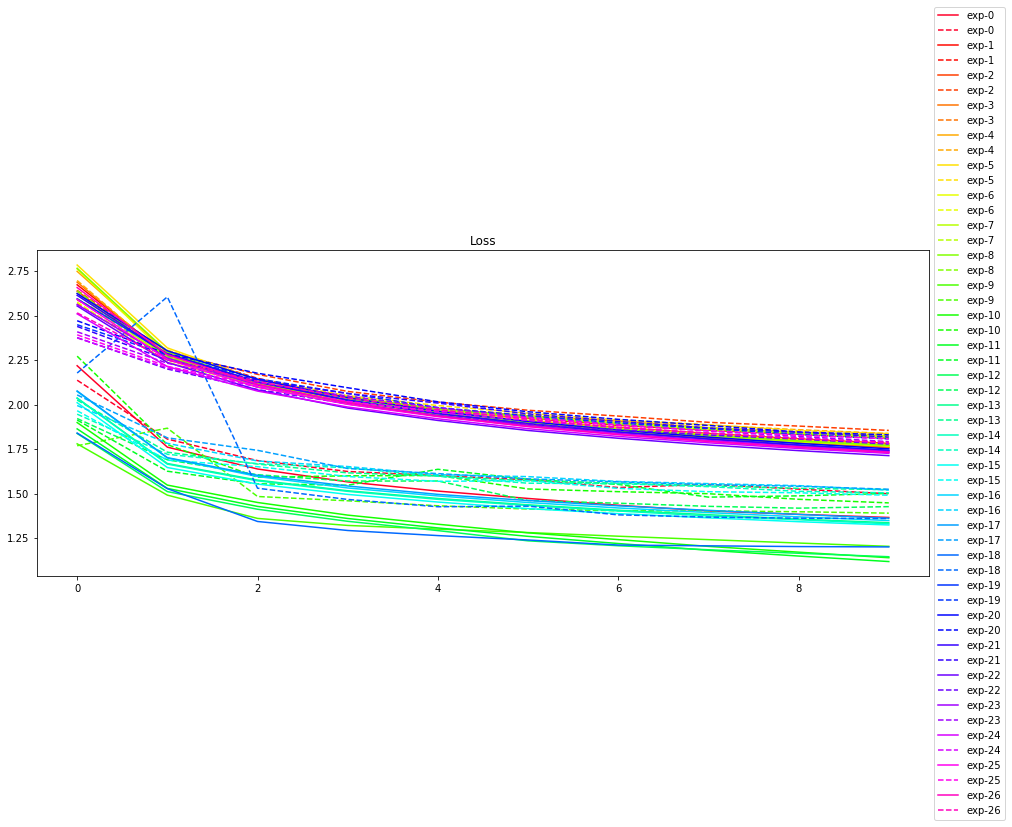

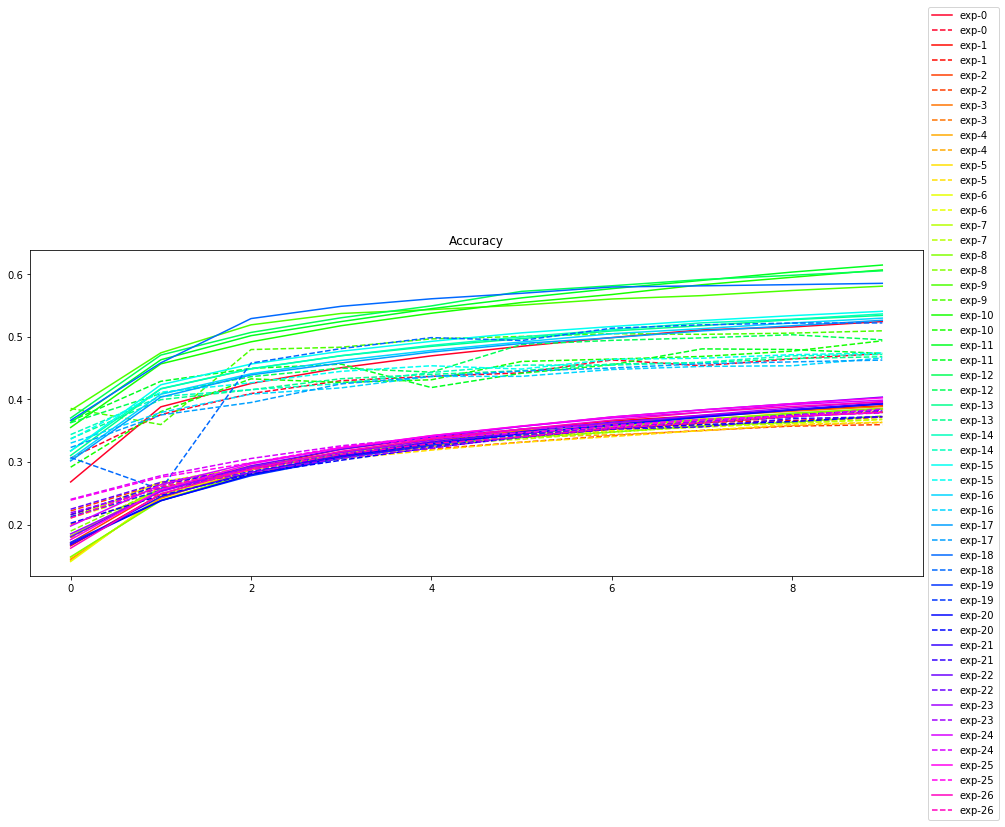

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(16,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(16,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()